In [ ]:
#!pip install yarl

In [6]:
#!pip install plotly_express

In [5]:
#!pip install texthero --user

## Load libraries

In [2]:
import pandas as pd
import plotly_express as px
from yarl import URL
import texthero as hero

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline

import scattertext as st
import nltk

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


## Load data

In [7]:
data_analyst = pd.read_csv("data-analyst-jobs.csv")
business_analyst = pd.read_csv("business-analyst-jobs.csv")
data_scientist = pd.read_csv("data-scientist-jobs.csv")

In [8]:
data_analyst["title"] = "data analyst"
business_analyst["title"] = "business analyst"
data_scientist["title"] = "data scientist"

df = pd.concat([data_analyst, business_analyst, data_scientist]).reset_index(drop=True)

In [9]:
df

,diffbotUri,humanLanguage,id,lastCrawlTime,name,pageUrl,requirements,resolvedPageUrl,summary,tasks,text,title,type,company
0,http://diffbot.com/entity/JOB3307461575,en,JOB3307461575,1552312065,Genomics Data Analyst and Database Manager,http://www.nature.com/naturejobs/science/jobs/...,NaN,https://www.nature.com/naturecareers/job?id=67...,Genomics Data Analyst and Database Manager\nMa...,NaN,Genomics Data Analyst and Database Manager\nMa...,data analyst,Job,NaN
1,http://diffbot.com/entity/JOB17660896611,en,JOB17660896611,1550846452,Data Analyst with Tableau Expertise,https://www.linkedin.com/jobs/view/805789826/,2+ years professional experience as a data ana...,NaN,"Job description\nNOTE: Currently, we are looki...",NaN,"Job description\nNOTE: Currently, we are looki...",data analyst,Job,NaN
2,http://diffbot.com/entity/JOB36339623293,en,JOB36339623293,1613889373,Data Analyst/Data Entry Analyst.,https://www.linkedin.com/jobs/data-analyst-job...,NaN,NaN,NaN,NaN,NaN,data analyst,Job,NaN
3,http://diffbot.com/entity/JOB38355557318,en,JOB38355557318,1580907361,Data Analyst / Bioinformatics Specialist,https://www.nature.com/naturecareers/job/data-...,NaN,NaN,000041\nData Analyst / Bioinformatics Speciali...,NaN,000041\nData Analyst / Bioinformatics Speciali...,data analyst,Job,NaN
4,http://diffbot.com/entity/JOB41116083536,en,JOB41116083536,1542432413,Data Analyst II,https://www.linkedin.com/jobs/view/655258760/,Bachelors degree (or country equivalent degree...,NaN,"Job Description\nData Analyst\nWayzata, MN\nHo...",Evaluate data for deviations from expected ass...,"Job Description\nData Analyst\nWayzata, MN\nHo...",data analyst,Job,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15977,http://diffbot.com/entity/JOB17761141770,en,JOB17761141770,1608023179,"Senior Data Scientist, Online in Atlanta, Georgia",https://militaryjobs.homedepot.com/atlanta-ga/...,NaN,NaN,\nJob Information\nPOSITION PURPOSE\nA Senior ...,NaN,\nJob Information\nPOSITION PURPOSE\nA Senior ...,data scientist,Job,NaN
15978,http://diffbot.com/entity/JOB17857447545,en,JOB17857447545,1490166113,Senior Data Scientist (m/f),https://jobs.teamviewer.com/en/job/senior-data...,"A Bachelor or MSc degree in Mathematics, Stati...",NaN,« Back to job search\nfor Business Intelligen...,"Develop, apply and maintain machine learning, ...",« Back to job search\nfor Business Intelligen...,data scientist,Job,NaN
15979,http://diffbot.com/entity/JOB17904956309,en,JOB17904956309,1553389539,Data Scientist (KTP Associate),https://www.jobs.manchester.ac.uk/displayjob.a...,NaN,NaN,\nThis is an exciting opportunity for an ambit...,NaN,\nThis is an exciting opportunity for an ambit...,data scientist,Job,NaN
15980,http://diffbot.com/entity/JOB18227069952,en,JOB18227069952,1581962061,Data Scientist Jobs in Texas,https://militaryjobs.homedepot.com/data-scient...,NaN,NaN,\nThe Home Depot is committed to being an equa...,The specific accommodation requested to comple...,\nThe Home Depot is committed to being an equa...,data scientist,Job,NaN


In [10]:
df = df[~df.text.isna()]

In [14]:
def get_page_source(url: str):
    return URL(url).host
    
df["page_host"] = df["pageUrl"].apply(get_page_source)

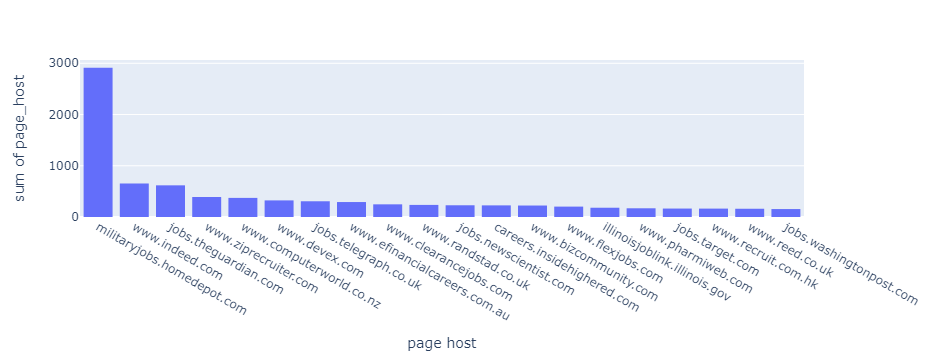

In [57]:
top_pages = df["page_host"].value_counts()[:20].to_frame()

fig = px.histogram(
    top_pages,
    x=top_pages.index,
    y="page_host",
    labels={"sum of page_host": "frequency", "index": "page host"},
).update_xaxes(
    categoryorder="total descending",
)

fig

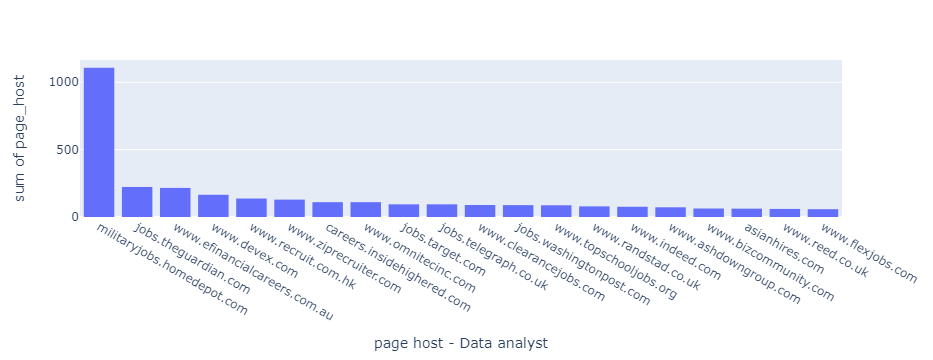

In [16]:
top_pages = df[df['title']=='data analyst']["page_host"].value_counts()[:20].to_frame()

fig = px.histogram(
    top_pages,
    x=top_pages.index,
    y="page_host",
    labels={"sum of page_host": "frequency", "index": "page host - Data analyst"},
).update_xaxes(
    categoryorder="total descending",
)

fig

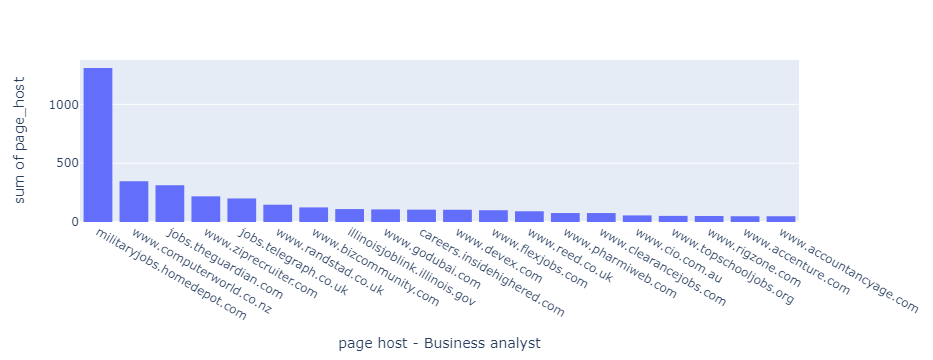

In [17]:
top_pages = df[df['title']=='business analyst']["page_host"].value_counts()[:20].to_frame()

fig = px.histogram(
    top_pages,
    x=top_pages.index,
    y="page_host",
    labels={"sum of page_host": "frequency", "index": "page host - Business analyst"},
).update_xaxes(
    categoryorder="total descending",
)

fig

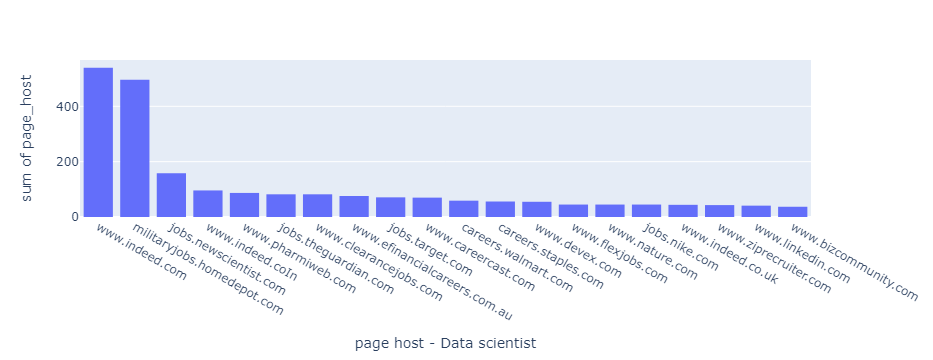

In [18]:
top_pages = df[df['title']=='data scientist']["page_host"].value_counts()[:20].to_frame()

fig = px.histogram(
    top_pages,
    x=top_pages.index,
    y="page_host",
    labels={"sum of page_host": "frequency", "index": "page host - Data scientist"},
).update_xaxes(
    categoryorder="total descending",
)

fig

## Analyze text - Wordcloud

In [18]:
# Clean text
df["text"] = df["text"].pipe(hero.clean)

# Turn a list of text into a string
text = " ".join(df["text"].values)

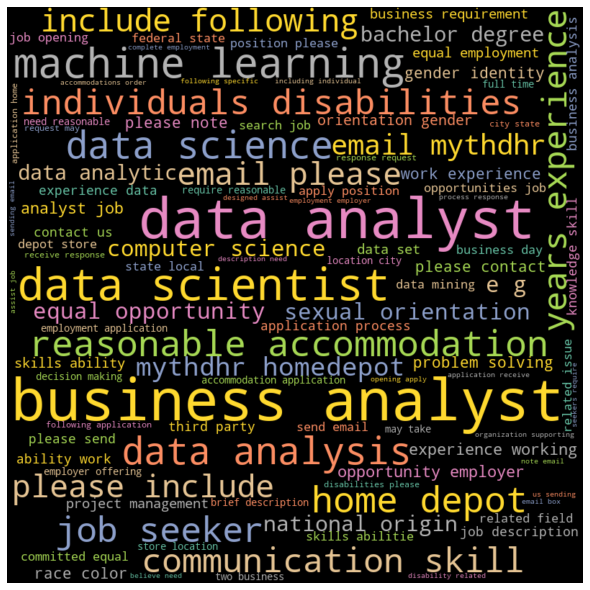

In [19]:
def make_wordcloud(new_text):
    """'function to make wordcloud"""

    wordcloud = WordCloud(
        width=800,
        height=800,
        min_font_size=10,
        background_color="black",
        colormap="Set2",
        collocation_threshold=3,
    ).generate(new_text)

    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

    return fig

text_cloud = make_wordcloud(text)

## Analyze job requirements

In [38]:
def get_corpus(df, category_col="title"):
    corpus = (
        st.CorpusFromParsedDocuments(df, category_col="title", parsed_col="parse")
        .build()
        .get_unigram_corpus()
        .compact(st.AssociationCompactor(2000))
    )
    return corpus
    
def get_html_comparison(corpus, category, category_name, not_category_name):
    html = st.produce_scattertext_explorer(
        corpus,
        category=category,
        category_name=category_name,
        not_category_name=not_category_name,
        minimum_term_frequency=5,
        pmi_threshold_coefficient=0,
        width_in_pixels=1000,
        metadata=corpus.get_df()["page_host"],
        transform=st.Scalers.dense_rank,
    )
    return html

In [23]:
analyze_col = "requirements"

# Filter out the rows whose requirement is nan
filtered_df = df[~df[analyze_col].isna()][["title", analyze_col, "page_host"]]

# Tokenize text
filtered_df["parse"] = filtered_df[analyze_col].apply(st.whitespace_nlp_with_sentences)

In [39]:
corpus = get_corpus(filtered_df)

In [40]:
#nltk.download("averaged_perceptron_tagger")

# get DataFrame with terms and their frequency
term_freq_df = corpus.get_term_freq_df()

# Get scaled F-scores of each term in each category
term_freq_df["Data Scientist Score"] = corpus.get_scaled_f_scores("data scientist")
term_freq_df["Data Analyst Score"] = corpus.get_scaled_f_scores("data analyst")
term_freq_df["Business Analyst Score"] = corpus.get_scaled_f_scores("business analyst")

# Remove terms that are not nouns
def is_noun(word: str):
    pos = nltk.pos_tag([word])[0][1]
    return pos[:2] == "NN"

term_freq_df = term_freq_df.loc[map(is_noun, term_freq_df.index)]

#### Frequent job requirements - Data scientists

In [41]:
term_freq_df.sort_values(by="Data Scientist Score", ascending=False).index[:30]

Index(['machine', 'python', 'science', 'statistics', 'r', 'computer',
       'techniques', 'field', 'mathematics', 'quantitative', 'analytics',
       'data', 'engineering', 'etc', 'research', 'languages', 'algorithms',
       'experience', 'hadoop', 'models', 'spark', 'mining', 'e', 'g', 'tools',
       'deep', 'phd', 'master', 'scale', 'java'],
      dtype='object', name='term')

#### Frequent job requirements - Data analyst

In [42]:
term_freq_df.sort_values(by="Data Analyst Score", ascending=False).index[:30]

Index(['excel', 'sql', 'data', 'skills', 'tools', 'ability', 'years', 'work',
       'reporting', 'tableau', 'etc', 'degree', 'knowledge', 's', 'database',
       'information', 'reports', 'e', 'systems', 'analytics', 'excellent',
       'use', 'microsoft', 'bachelor', 'g', 'issues', 'ms', 'relevant', 'sas',
       'access'],
      dtype='object', name='term')

#### Frequent job requirements - Business analyst

In [43]:
term_freq_df.sort_values(by="Business Analyst Score", ascending=False).index[:30]

Index(['requirements', 'project', 'business', 'management', 'process',
       'skills', 'analyst', 'development', 'ability', 'processes', 'knowledge',
       'work', 'communication', 'analysis', 'information', 'user', 'projects',
       'team', 'experience', 'systems', 'solutions', 'degree', 'stakeholders',
       's', 'teams', 'environment', 'multiple', 'system', 'support',
       'excellent'],
      dtype='object', name='term')

#### Job requirement - Data analyst vs. Data scientist

In [45]:
corpus = get_corpus(filtered_df[filtered_df['title'].isin(["data analyst", "data scientist"]) ])
html = get_html_comparison(corpus = corpus, category = "data analyst", category_name = "Data Analyst", not_category_name = "Data Scientist")
open("data_analyst_vs_data_scientist_requirements_terms.html", "w", encoding="utf-8").write(html)

3270343

#### Job requirement - Data analyst vs. Business analyst

In [44]:
corpus = get_corpus(filtered_df[filtered_df['title'].isin(["data analyst", "business analyst"]) ])
html = get_html_comparison(corpus = corpus, category = "data analyst", category_name = "Data Analyst", not_category_name = "Business Analyst")
open("data_analyst_vs_business_analyst_requirements_terms.html", "w", encoding="utf-8").write(html)

3288558

## Analyzing Tasks

In [49]:
analyze_col = "tasks"

# Filter out the rows whose requirement is nan
filtered_df = df[~df[analyze_col].isna()][["title", analyze_col, "page_host"]]

# Tokenize text
filtered_df["parse"] = filtered_df[analyze_col].apply(st.whitespace_nlp_with_sentences)

In [50]:
corpus = get_corpus(filtered_df)

In [51]:
# get DataFrame with terms and their frequency
term_freq_df = corpus.get_term_freq_df()

# Get scaled F-scores of each term in each category
term_freq_df["Data Scientist Score"] = corpus.get_scaled_f_scores("data scientist")
term_freq_df["Data Analyst Score"] = corpus.get_scaled_f_scores("data analyst")
term_freq_df["Business Analyst Score"] = corpus.get_scaled_f_scores("business analyst")
term_freq_df = term_freq_df.loc[map(is_noun, term_freq_df.index)]

#### Frequent tasks - Data scientists

In [52]:
term_freq_df.sort_values(by="Data Scientist Score", ascending=False).index[:30]

Index(['machine', 'models', 'science', 'algorithms', 'techniques', 'analytics',
       'problems', 'data', 'python', 'research', 'solutions', 'r',
       'statistics', 'design', 'engineering', 'product', 'build', 'methods',
       'tools', 'predictive', 'insights', 's', 'computer', 'results', 'etc',
       'model', 'implement', 'optimization', 'e', 'g'],
      dtype='object', name='term')

#### Frequent tasks - Data analyst

In [53]:
term_freq_df.sort_values(by="Data Analyst Score", ascending=False).index[:30]

Index(['data', 'reports', 'reporting', 'analysis', 'skills', 'analytics',
       'tools', 'sql', 'experience', 'work', 'ability', 'support', 'quality',
       'excel', 'information', 'performance', 'database', 's', 'insights',
       'results', 'communication', 'etc', 'degree', 'dashboards', 'excellent',
       'sources', 'research', 'metrics', 'sets', 'maintain'],
      dtype='object', name='term')

#### Frequent tasks - Business analyst

In [54]:
term_freq_df.sort_values(by="Business Analyst Score", ascending=False).index[:30]

Index(['requirements', 'business', 'project', 'analyst', 'process',
       'management', 'processes', 'support', 'development', 'system',
       'knowledge', 'application', 'provide', 'analysis', 'skills', 'user',
       'ability', 'experience', 'systems', 'solutions', 'work', 'team',
       'stakeholders', 'teams', 'technology', 'training', 'employment',
       'accommodation', 'information', 'projects'],
      dtype='object', name='term')

#### Tasks - Data analyst vs. Data scientist

In [56]:
corpus = get_corpus(filtered_df[filtered_df['title'].isin(["data analyst", "data scientist"]) ])
html = get_html_comparison(corpus = corpus, category = "data analyst", category_name = "Data Analyst", not_category_name = "Data Scientist")
open("data_analyst_vs_data_scientist_tasks.html", "w", encoding="utf-8").write(html)

5734028

#### Tasks - Data analyst vs. Business analyst

In [55]:
corpus = get_corpus(filtered_df[filtered_df['title'].isin(["data analyst", "business analyst"]) ])
html = get_html_comparison(corpus = corpus, category = "data analyst", category_name = "Data Analyst", not_category_name = "Business Analyst")
open("data_analyst_vs_business_analyst_tasks.html", "w", encoding="utf-8").write(html)

6474887